# Bank Loan Approval Prediction using Artificial Neaural Network

In this project, we will build and train a deep neaural network model to predict the likelyhood of a liability customer buying personal loans based on customer features.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt

In [ ]:
bank_df = pd.read_csv("UniversalBank.csv")

In [ ]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
bank_df.shape

(5000, 14)

- ID: Customer ID
- Age: Customer Age
- Experience: Amount of work experience in years
- Income: Amount of annual income (in thousands)
- Zipcode: Zipcode of where customer lives
- Family: Number of family members
- CCAvg: Average monthly credit card spendings
- Education: Education level (1: Bachelor, 2: Master, 3: Advanced Degree)
- Mortgage: Mortgage of house (in thousands)
- Securities Account: Boolean of whether customer has a securities account
- CD Account: Boolean of whether customer has Certificate of Deposit account
- Online: Boolean of whether customer uses online banking
- CreditCard: Does the customer use credit card issued by the bank?
- Personal Loan: This is the target variable (Binary Classification Problem)

## Exploratory Data Analysis

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Great, we have no missing values!

In [ ]:
avg_age = bank_df["Age"].mean()
print ("The average age of this dataset is {:.1f}.".format(avg_age))

The average age of this dataset is 45.3.


In [ ]:
percent_cc = sum(bank_df["CreditCard"] == 1)/len(bank_df)
print ("The percentage of customers that own the bank's credit card is {:.2%}.".format(percent_cc))

The percentage of customers that own the bank's credit card is 29.40%.


In [ ]:
percent_loan = sum(bank_df["Personal Loan"] == 1)/len(bank_df)
print ("The percentage of customers that took out a personal loan is {:.2%}.".format(percent_loan))

The percentage of customers that took out a personal loan is 9.60%.


## Data Visualization

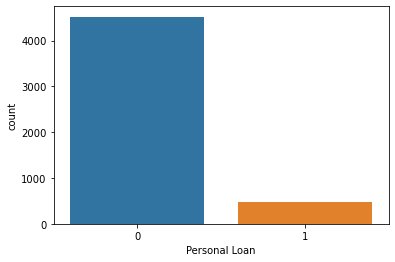

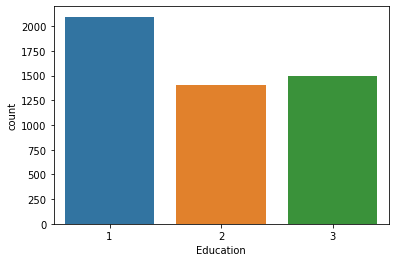

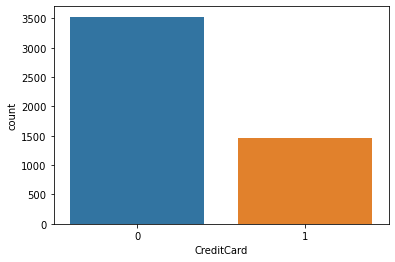

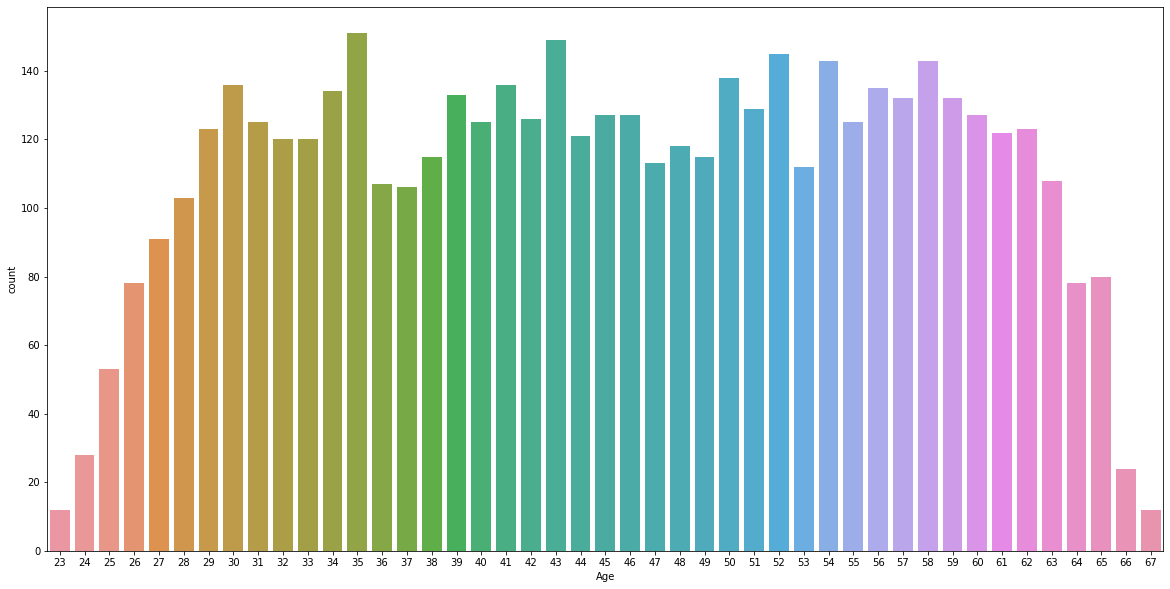

In [ ]:
sns.countplot(x=bank_df["Personal Loan"])
plt.show()

sns.countplot(x=bank_df["Education"])
plt.show()

sns.countplot(x=bank_df["CreditCard"])
plt.show()

plt.figure(figsize=(20,10))
sns.countplot(x=bank_df["Age"])
plt.savefig('age.png', facecolor='w', bbox_inches='tight')
plt.show()

/Users/dimas/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


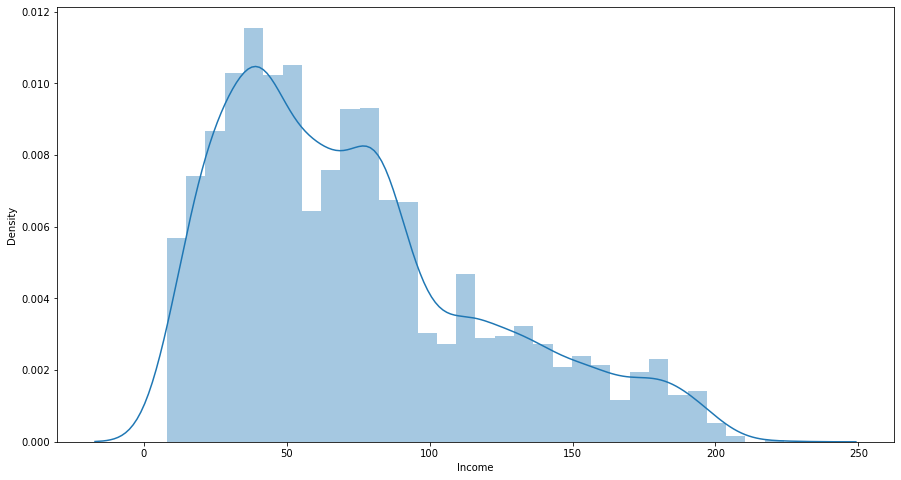

In [ ]:
# lets look at the distribution of the income
plt.figure(figsize=(15,8))
sns.distplot(bank_df["Income"])
plt.savefig('income.png', facecolor='w', bbox_inches='tight')
plt.show()

In [ ]:
# lets create 2 dataframes: one with personal loans and one without personal loans
personal_loans = bank_df[bank_df['Personal Loan'] == 1].copy()
no_personal_loans = bank_df[bank_df['Personal Loan'] == 0].copy()

In [ ]:
personal_loans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,480.0,2390.650000,1394.393674,10.0,1166.50,2342.0,3566.0000,4981.0
Age,480.0,45.066667,11.590964,26.0,35.00,45.0,55.0000,65.0
Experience,480.0,19.843750,11.582443,0.0,9.00,20.0,30.0000,41.0
Income,480.0,144.745833,31.584429,60.0,122.00,142.5,172.0000,203.0
ZIP Code,480.0,93153.202083,1759.223753,90016.0,91908.75,93407.0,94705.5000,96008.0
Family,480.0,2.612500,1.115393,1.0,2.00,3.0,4.0000,4.0
CCAvg,480.0,3.905354,2.097681,0.0,2.60,3.8,5.3475,10.0
Education,480.0,2.233333,0.753373,1.0,2.00,2.0,3.0000,3.0
Mortgage,480.0,100.845833,160.847862,0.0,0.00,0.0,192.5000,617.0
Personal Loan,480.0,1.000000,0.000000,1.0,1.00,1.0,1.0000,1.0


In [ ]:
no_personal_loans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4520.0,2512.165487,1448.299331,1.0,1259.75,2518.5,3768.25,5000.0
Age,4520.0,45.367257,11.450427,23.0,35.00,45.0,55.00,67.0
Experience,4520.0,20.132301,11.456672,-3.0,10.00,20.0,30.00,43.0
Income,4520.0,66.237389,40.578534,8.0,35.00,59.0,84.00,224.0
ZIP Code,4520.0,93152.428761,2156.949654,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4520.0,2.373451,1.148771,1.0,1.00,2.0,3.00,4.0
CCAvg,4520.0,1.729009,1.567647,0.0,0.60,1.4,2.30,8.8
Education,4520.0,1.843584,0.839975,1.0,1.00,2.0,3.00,3.0
Mortgage,4520.0,51.789381,92.038931,0.0,0.00,0.0,98.00,635.0
Personal Loan,4520.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


/Users/dimas/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dimas/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


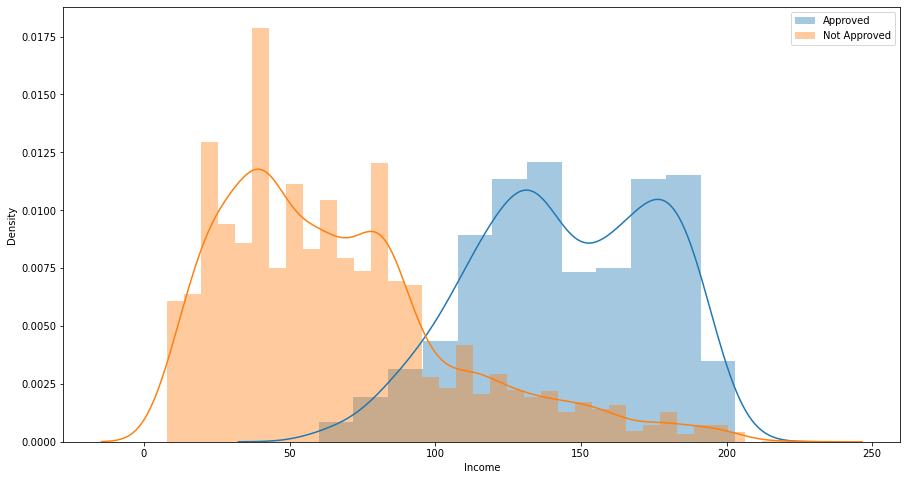

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(personal_loans["Income"], label='Approved')
sns.distplot(no_personal_loans["Income"], label='Not Approved')
plt.legend()
plt.savefig('approved_not_approved.png', facecolor='w', bbox_inches='tight')
plt.show()

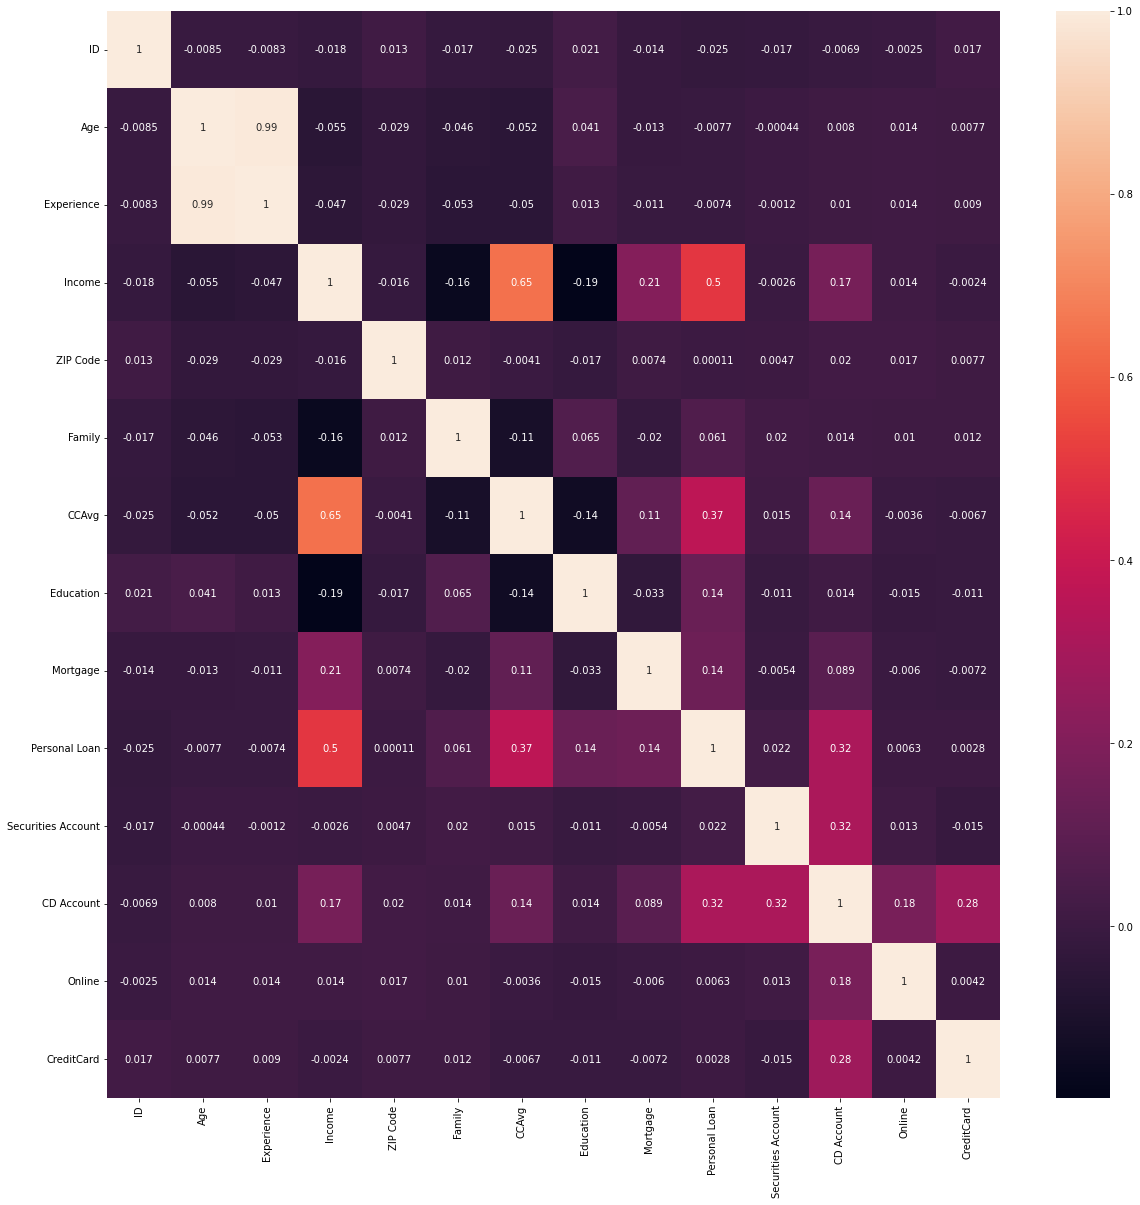

In [ ]:
cm = bank_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True)
plt.savefig('heatmap.png', facecolor='w', bbox_inches='tight')
plt.show()

/Users/dimas/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


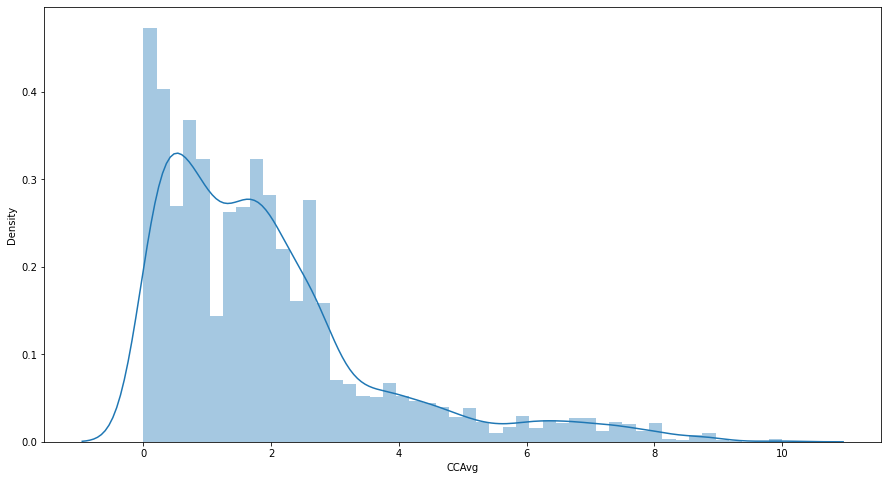

In [ ]:
# lets look at the distribution of average credit card spending
plt.figure(figsize=(15,8))
sns.distplot(bank_df["CCAvg"])
plt.show()

/Users/dimas/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dimas/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


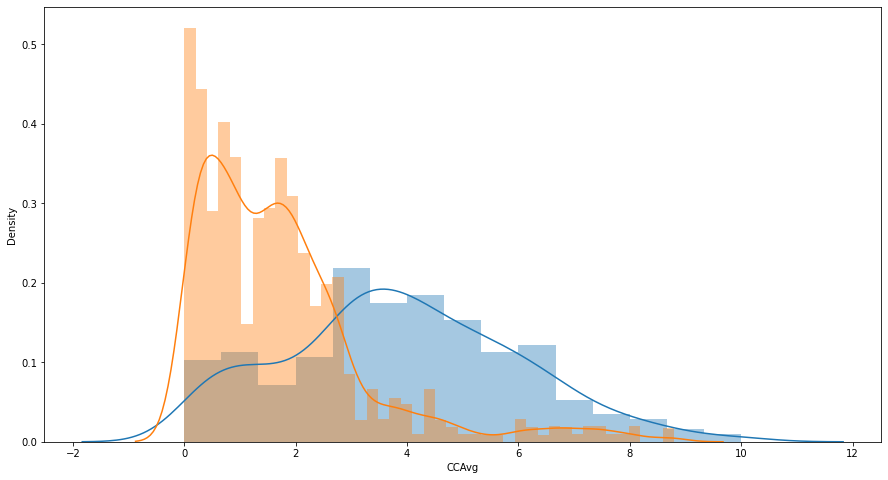

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(personal_loans["CCAvg"])
sns.distplot(no_personal_loans["CCAvg"])
plt.show()

In [ ]:
categorical=[col for col in bank_df.columns if bank_df[col].nunique()<=5]
continous=[col for col in bank_df.columns if bank_df[col].nunique()>5]
print(categorical)
print(continous)

['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


In [ ]:
categorical.remove("Personal Loan")
continous.remove("ID")
print(categorical)
print(continous)

['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


### Distplot

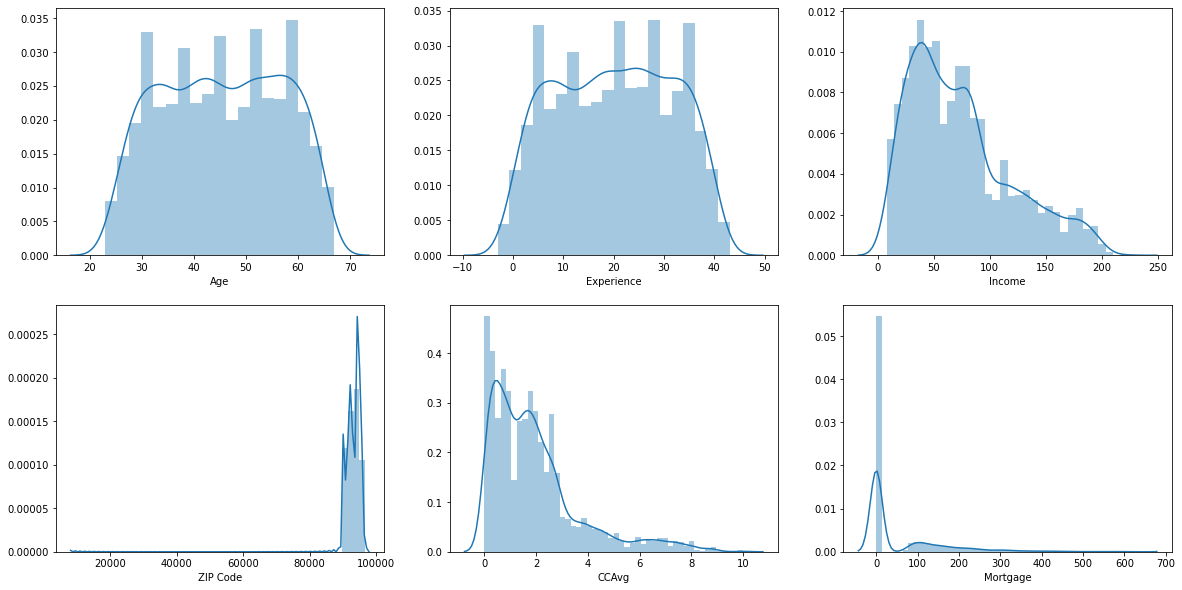

In [ ]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continous):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(bank_df[col])

So Mortgage has maximum values as 0

ZIP Code is of some particular area.

Expirence and Age are uniformly distributed.

### Countplot

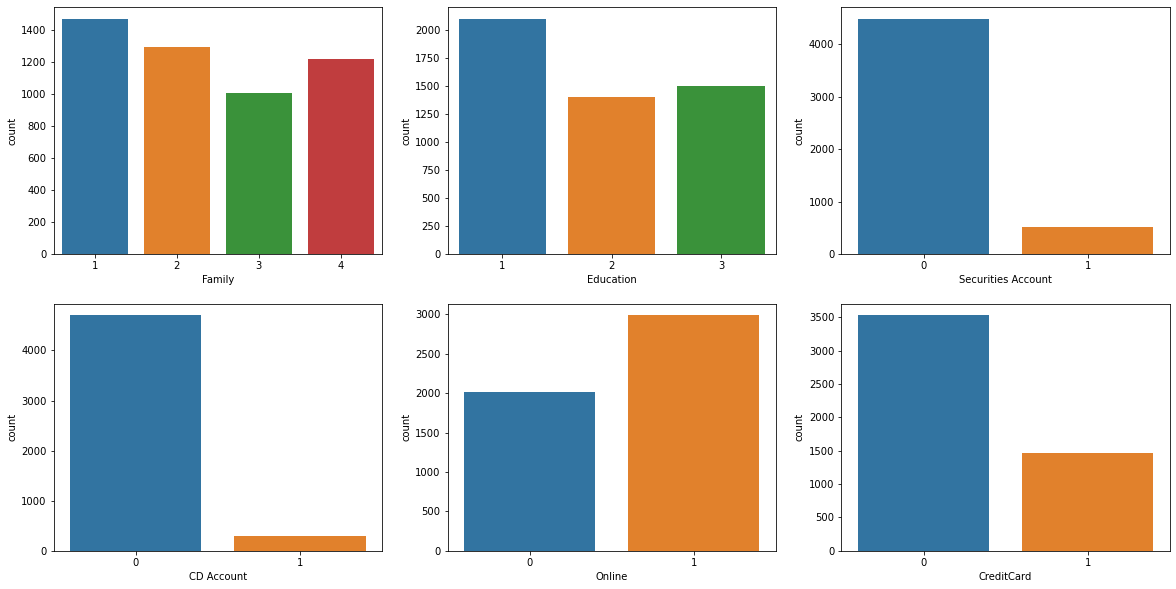

In [ ]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(bank_df[col])

Most people are Ungrad

most people does not have securities account

most people does not have CD account

most people use Internet banking

most people does not have credit card

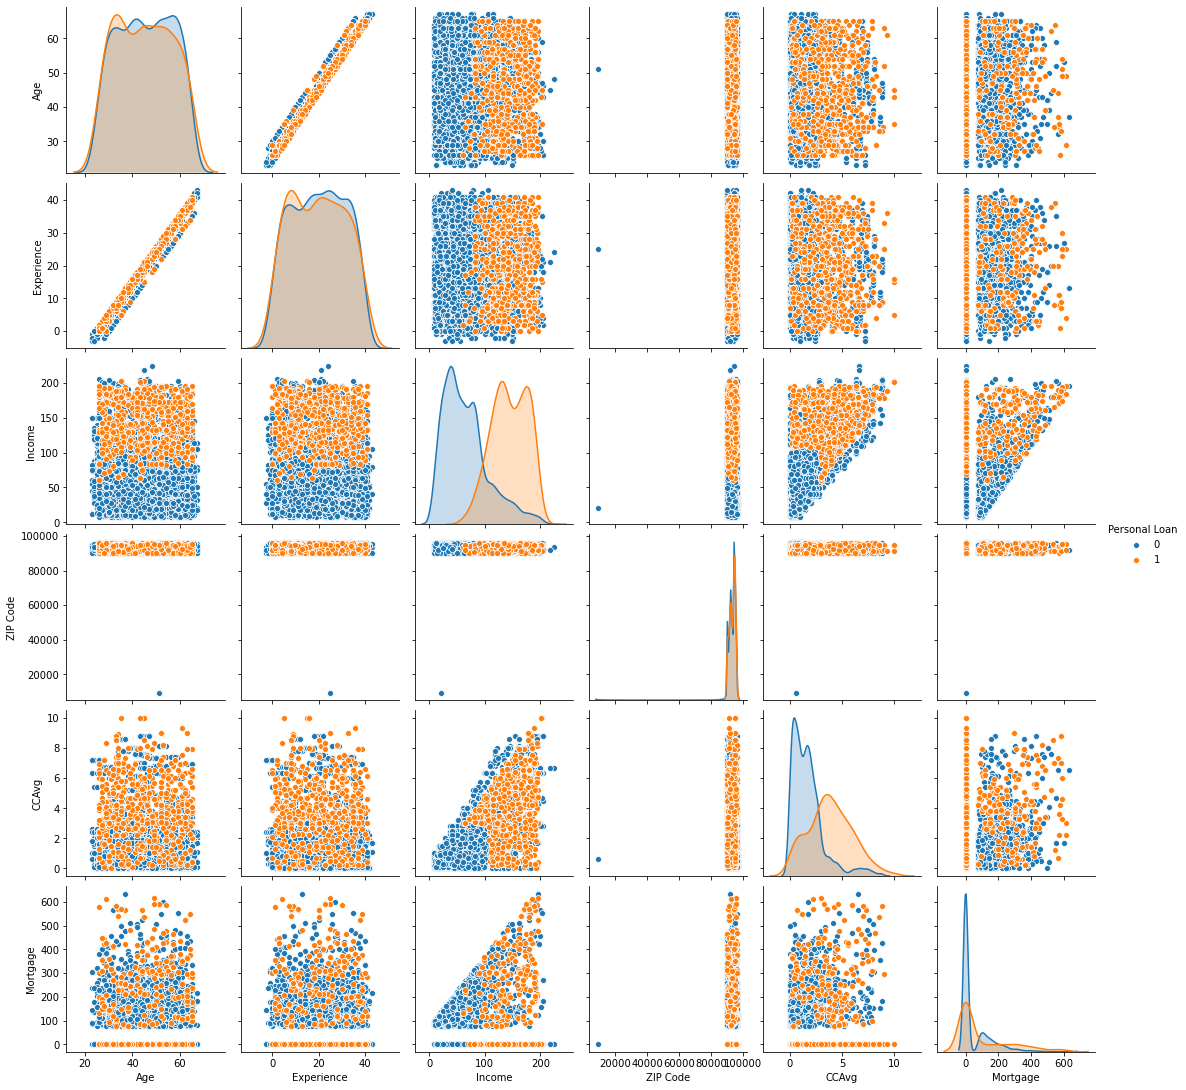

In [ ]:
sns.pairplot(bank_df,
    x_vars=['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage'],
    y_vars=['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage'],
             diag_kind="kde",hue="Personal Loan")
plt.show()

## Data Preparation

In [ ]:
from tensorflow.keras.utils import to_categorical

X = bank_df.drop(columns=["Personal Loan"])
y = bank_df["Personal Loan"]

y = to_categorical(y)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4500, 13), (500, 13), (4500, 2), (500, 2))

## Building a multi-layer neaural network model

In [ ]:
# sequential model
ann_model = keras.Sequential()

# adding dense layer
ann_model.add(Dense(250, input_dim=13, kernel_initializer='normal', activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.4))
ann_model.add(Dense(250, activation='linear'))
ann_model.add(Dropout(0.4))

# adding dense layer with softmax activation/output layer
ann_model.add(Dense(2, activation='softmax'))
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               3500      
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               125500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               2

2022-12-03 17:44:58.866360: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
 dense_4 (Dense)             (None, 250)               125250    
                                                                 
 dropout_4 (Dropout)         (None, 250)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 502       
                                                                 
Total params: 755,752
Trainable params: 755,752
Non-trainable params: 0
_________________________________________________________________


## Compilation and training of deep learning model

In [ ]:
# custom functions for f1, precision and recall

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']

In [ ]:
history = ann_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
113/113 [==============================] - 4s 17ms/step - loss: 0.1811 - f1_m: 0.9336 - val_loss: 0.0867 - val_f1_m: 0.9655
Epoch 2/20
113/113 [==============================] - 2s 15ms/step - loss: 0.1102 - f1_m: 0.9560 - val_loss: 0.0830 - val_f1_m: 0.9644
Epoch 3/20
113/113 [==============================] - 2s 15ms/step - loss: 0.0850 - f1_m: 0.9699 - val_loss: 0.0501 - val_f1_m: 0.9784
Epoch 4/20
113/113 [==============================] - 2s 14ms/step - loss: 0.0762 - f1_m: 0.9751 - val_loss: 0.0604 - val_f1_m: 0.9806
Epoch 5/20
113/113 [==============================] - 2s 15ms/step - loss: 0.0705 - f1_m: 0.9773 - val_loss: 0.0509 - val_f1_m: 0.9849
Epoch 6/20
113/113 [==============================] - 2s 15ms/step - loss: 0.0672 - f1_m: 0.9770 - val_loss: 0.0526 - val_f1_m: 0.9838
Epoch 7/20
113/113 [==============================] - 2s 15ms/step - loss: 0.0620 - f1_m: 0.9790 - val_loss: 0.0489 - val_f1_m: 0.9817
Epoch 8/20
113/113 [==============================] - 2

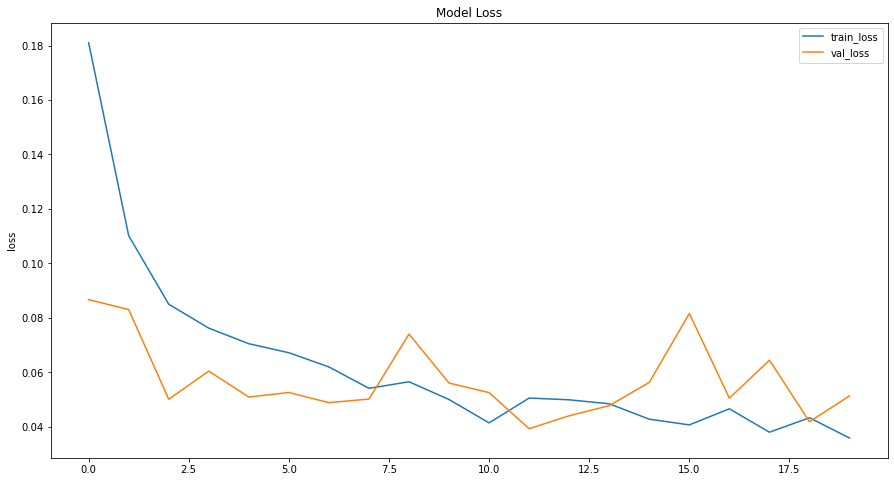

In [ ]:
# Plot the model performance across epochs
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.savefig('modelloss.png', facecolor='w', bbox_inches='tight')
plt.show()

## Evaluating model performance

In [ ]:
predictions = ann_model.predict(X_test)
predict = []

for i in predictions:
    predict.append(np.argmax(i))

16/16 [==============================] - 0s 4ms/step


In [ ]:
from sklearn import metrics
y_test = np.argmax(y_test, axis=1)

f1_test = metrics.f1_score(y_test, predict)
prec = metrics.precision_score(y_test, predict)
rec = metrics.recall_score(y_test, predict)
acc = metrics.accuracy_score(y_test, predict)

print ("F1 Score: {:.4f}.".format(f1_test))
print ("Precision: {:.4f}.".format(prec))
print ("Recall: {:.4f}.".format(rec))
print ("Accuracy: {:.4f}.".format(acc)) # note this is not a good measure of performance for this project as dataset is unbalanced.

F1 Score: 0.9189.
Precision: 0.9273.
Recall: 0.9107.
Accuracy: 0.9820.


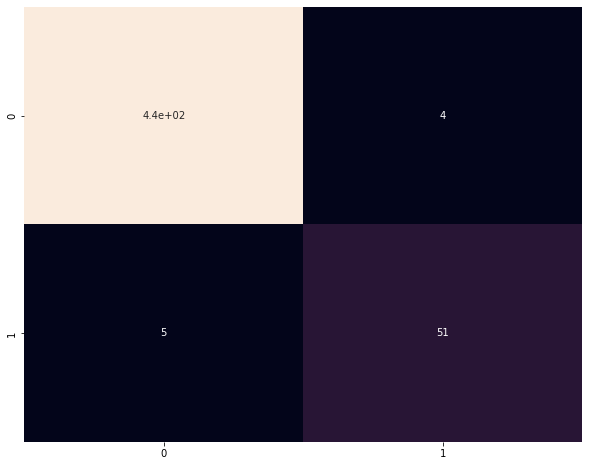

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, predict)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cbar=False)
plt.savefig('conf_matrix.png', facecolor='w', bbox_inches='tight')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       444
           1       0.93      0.91      0.92        56

    accuracy                           0.98       500
   macro avg       0.96      0.95      0.95       500
weighted avg       0.98      0.98      0.98       500

